<a href="https://colab.research.google.com/github/XavierCarrera/Platzi-Master-DS-Exercises/blob/master/Basic_Exercise_DS_Python2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import sklearn as sk
from sklearn import preprocessing
import matplotlib.pyplot as plt

# 1. Read the csv file and show columns

In [105]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [106]:
df = pd.read_csv('cruise_ship_info.csv')
df.columns

Index(['Ship_name', 'Cruise_line', 'Age', 'Tonnage', 'passengers', 'length',
       'cabins', 'passenger_density', 'crew'],
      dtype='object')

# 2. Basic statistic analysis

In [107]:
pd.isnull(df).sum()

Ship_name            0
Cruise_line          0
Age                  0
Tonnage              0
passengers           0
length               0
cabins               0
passenger_density    0
crew                 0
dtype: int64

In [ ]:
df[df.duplicated()]

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew


In [ ]:
df[["Age", "Tonnage", "passengers", "length", "cabins", "passenger_density", "crew"]].describe()

,Age,Tonnage,passengers,length,cabins,passenger_density,crew
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,15.689873,71.284671,18.457405,8.130633,8.830000,39.900949,7.794177
std,7.615691,37.229540,9.677095,1.793474,4.471417,8.639217,3.503487
min,4.000000,2.329000,0.660000,2.790000,0.330000,17.700000,0.590000
25%,10.000000,46.013000,12.535000,7.100000,6.132500,34.570000,5.480000
50%,14.000000,71.899000,19.500000,8.555000,9.570000,39.085000,8.150000
75%,20.000000,90.772500,24.845000,9.510000,10.885000,44.185000,9.990000
max,48.000000,220.000000,54.000000,11.820000,27.000000,71.430000,21.000000


<function matplotlib.pyplot.show>

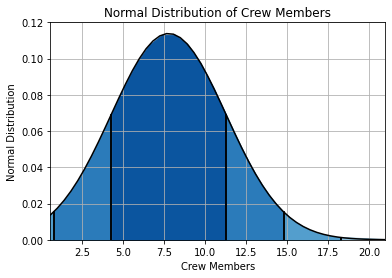

In [108]:
# CREW ANALYSIS -- NORMAL DISTRIBUTION

crew_min = pd.DataFrame.min(df["crew"])
crew_max = pd.DataFrame.max(df["crew"])

crew_mean = pd.DataFrame.mean(df["crew"])
crew_std = pd.DataFrame.std(df["crew"])

crew_x = np.linspace(crew_min, crew_max)
crew_y = scipy.stats.norm.pdf(crew_x,crew_mean,crew_std)

plt.plot(crew_x, crew_y, color = "black")

## Sigma 1

pt1 = crew_mean + crew_std
plt.plot([pt1 ,pt1 ],[0.0,scipy.stats.norm.pdf(pt1 ,crew_mean, crew_std)], color='black')

pt2 = crew_mean - crew_std
plt.plot([pt2 ,pt2 ],[0.0,scipy.stats.norm.pdf(pt2 ,crew_mean, crew_std)], color='black')

ptx = np.linspace(pt1, pt2, 10)
pty = scipy.stats.norm.pdf(ptx, crew_mean, crew_std)

plt.fill_between(ptx, pty, color='#0b559f', alpha=1.0)

## Simga +2

pt1 = crew_mean + crew_std
plt.plot([pt1 ,pt1 ],[0.0,scipy.stats.norm.pdf(pt1, crew_mean, crew_std)], color='black')

pt2 = crew_mean + 2.0 * crew_std
plt.plot([pt2 ,pt2 ],[0.0,scipy.stats.norm.pdf(pt2, crew_mean, crew_std)], color='black')

ptx = np.linspace(pt1, pt2, 10)
pty = scipy.stats.norm.pdf(ptx, crew_mean, crew_std)

plt.fill_between(ptx, pty, color='#2b7bba', alpha=1.0)

## Sigma -2 

pt1 = crew_mean - crew_std
plt.plot([pt1 ,pt1 ],[0.0,scipy.stats.norm.pdf(pt1, crew_mean, crew_std)], color='black')

pt2 = crew_mean - 2.0 * crew_std
plt.plot([pt2 ,pt2 ],[0.0,scipy.stats.norm.pdf(pt2, crew_mean, crew_std)], color='black')

ptx = np.linspace(pt1, pt2, 10)
pty = scipy.stats.norm.pdf(ptx,crew_mean,crew_std)

plt.fill_between(ptx, pty, color='#2b7bba', alpha=1.0)

## Sigma +3

pt1 = crew_mean + 2.0 * crew_std
plt.plot([pt1 ,pt1 ],[0.0,scipy.stats.norm.pdf(pt1, crew_mean, crew_std)], color='black')

pt2 = crew_mean + 3.0 * crew_std
plt.plot([pt2 ,pt2 ],[0.0,scipy.stats.norm.pdf(pt2, crew_mean, crew_std)], color='black')

ptx = np.linspace(pt1, pt2, 10)
pty = scipy.stats.norm.pdf(ptx,crew_mean,crew_std)

plt.fill_between(ptx, pty, color='#539ecd', alpha=1.0)

## Sigma -3

pt1 = crew_mean - 2.0 * crew_std
plt.plot([pt1 ,pt1 ],[0.0,scipy.stats.norm.pdf(pt1, crew_mean, crew_std)], color='black')

pt2 = crew_mean - 3.0 * crew_std
plt.plot([pt2 ,pt2 ],[0.0,scipy.stats.norm.pdf(pt2, crew_mean, crew_std)], color='black')

ptx = np.linspace(pt1, pt2, 10)
pty = scipy.stats.norm.pdf(ptx,crew_mean,crew_std)

plt.fill_between(ptx, pty, color='#539ecd', alpha=1.0)

## Sigma +4

pt1 = crew_mean + 3.0 * crew_std
plt.plot([pt1 ,pt1 ],[0.0,scipy.stats.norm.pdf(pt1, crew_mean, crew_std)], color='black')

pt2 = crew_mean + 10.0 * crew_std
plt.plot([pt2 ,pt2 ],[0.0,scipy.stats.norm.pdf(pt2, crew_mean, crew_std)], color='black')

ptx = np.linspace(pt1, pt2, 10)
pty = scipy.stats.norm.pdf(ptx,crew_mean,crew_std)

plt.fill_between(ptx, pty, color='#89bedc', alpha=1.0)

## Plotting

plt.grid()

plt.xlim(crew_min, crew_max)
plt.ylim(0,0.12)

plt.title("Normal Distribution of Crew Members")

plt.xlabel("Crew Members")
plt.ylabel("Normal Distribution")

plt.show

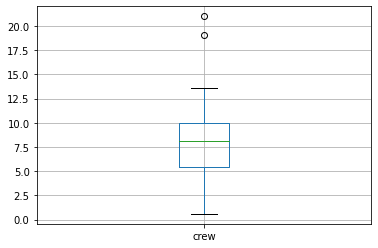

In [110]:
# CREW ANALYSIS -- BOXPLOT

crew_boxplot = df.boxplot(column=['crew'])

**Dispertion Analysis**

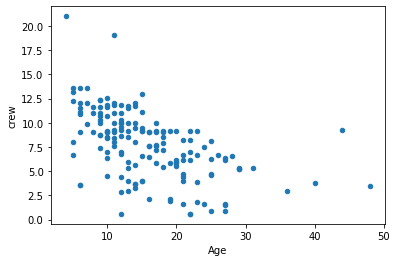

In [121]:
crew_age = df.plot.scatter(x = "Age", y = "crew")

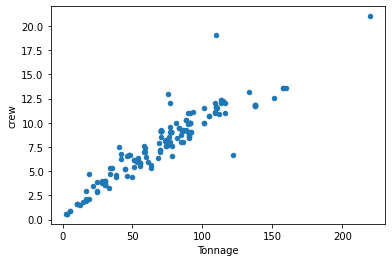

In [122]:
crew_tonnage = df.plot.scatter(x = "Tonnage", y = "crew")

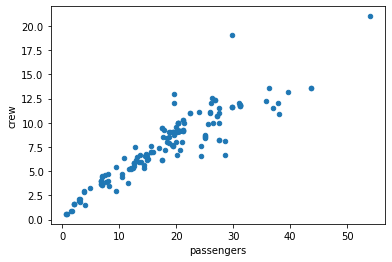

In [123]:
crew_pass = df.plot.scatter(x = "passengers", y = "crew")

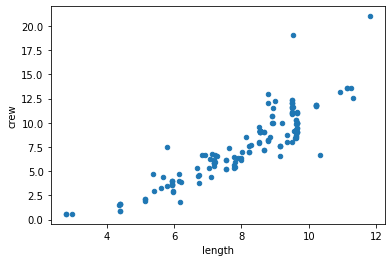

In [124]:
crew_length = df.plot.scatter(x = "length", y = "crew")

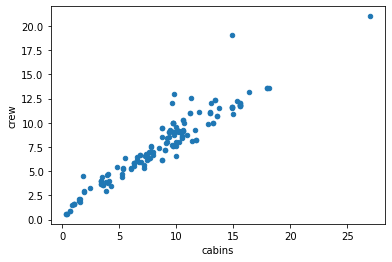

In [125]:
crew_cabins = df.plot.scatter(x = "cabins", y = "crew")

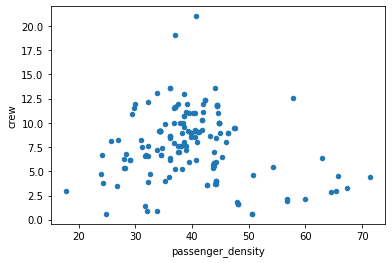

In [126]:
crew_denpass = df.plot.scatter(x = "passenger_density", y = "crew")

For our Exploratory Data Analysis, we start first assesing the most important variable for the recommendation algorithm: crew members. 

A remarkable fact is that the standard deviation is considerable: 44.92%. The latter means that our data extends through a large range around the median value. Likewise, the bloxpot graph allows to see the existance of few outliers which might have an impact on the position of our mean value.

The most outstanding discovery of the EDA process is the correlation between variables. We start from assigning crew members as an dependant value in the y axis and the independent value in the x axis for the remaining values. We're, thus, assuming that the number of crew members depends on the condition of the ship - e.g. the oldest or larger the ship is, a more significant crew is needed to attend the ship. 

There's a strong correlation in 4 of the 6 independent variables analyzed, which are going to be part of the model to be trained. 

# 3 and 4. Column Selection and Deleting

For our project, we're going to make an algorithm which recommends a number of crew members based on relatable variables such as age, tonnage, passengers capacity and length. Passenger density is to be deleted because it can be inferred with length and passengers number. Cabins and age, on the other side, doesn't provide further information value given the results of the scatter plots during the EDA process.

We'll also delete de Cruise_line column, because we only need the Ship name for indexing purposes. 

In [ ]:
df = df.drop(["Cruise_line", "Age", "cabins", "passenger_density"], axis=1)
df

# 5. One-Hot Coding

The cathegorial values help as indexes through the rest of our data set. However, they can't be implemented as one-hot coding because they neither are binary nor they have an ordinal relationship. 

Therefore, we will use label values. 

In [132]:
label = preprocessing.LabelEncoder()
df["Ship_name"] = label.fit_transform (df['Ship_name'])
df

,Ship_name,Cruise_line,Tonnage,passengers,length,crew
0,52,Azamara,30.277,6.94,5.94,3.55
1,91,Azamara,30.277,6.94,5.94,3.55
2,11,Carnival,47.262,14.86,7.22,6.70
3,15,Carnival,110.000,29.74,9.53,19.10
4,20,Carnival,101.353,26.42,8.92,10.00
...,...,...,...,...,...,...
153,119,Star,3.341,0.66,2.79,0.59
154,126,Star,76.800,19.60,8.79,12.00
155,110,Windstar,5.350,1.58,4.40,0.88
156,112,Windstar,5.350,1.67,4.40,0.88


# 6. Training Clusters and Testing

# 7. Model Training

# 8. Hyperparameters